In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader
import math
import matplotlib.pyplot as plt
import numpy as np
import io
import pandas as pd
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
url = 'https://raw.githubusercontent.com/trishattah/Capstone/main/spotify_songs-2_00.csv'
df2 = pd.read_csv(url)

In [3]:
#url = 'https://raw.githubusercontent.com/trishattah/Capstone/main/Emotion_Labels.csv'
#df3 = pd.read_csv(url)

In [4]:
#df4 = pd.merge(df2,df3,on='track_id')
#df4 = df2.drop(['Unnamed: 19'], axis=1)
df4=df2

In [5]:
df4 = df4.dropna()
df4.shape

(2490, 16)

In [6]:
df4['playlist_id'].value_counts()

sub                       686
3ykXidKLz1eYPvuGoFlD1e     17
37i9dQZF1DWUFmyho2wkQU     15
4NlAd9NpIa92IjErMyAriM     13
44bkJI1QGkT2O0GYJSsbkp     12
                         ... 
2EnVd4ugXUybVQoQrarICY      1
2wP2UAYC4Nqb6oUXkMJlAz      1
5ifDekrUt5lbSIMTSzNNqB      1
37i9dQZF1DWWQRwui0ExPn      1
6SrHyxIxWfQx9ISEr6yowk      1
Name: playlist_id, Length: 414, dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df11 = df2.drop(['playlist_id','track_id','track_name','track_artist'], axis=1)
cols = ['language', 'playlist_genre']
#df11[cols] = df11[cols].apply(LabelEncoder().fit_transform)

df12 = df2.set_index('track_name')

In [8]:
testdf = df4[df4['playlist_id'].isin(['5jROYSZSL7cO0jGAqkPx7C', '3ykXidKLz1eYPvuGoFlD1e','4hKPJNFIhdAg4pAksn78FJ'])]
testdf1 =  df4[df4['playlist_id'].isin(['5jROYSZSL7cO0jGAqkPx7C'])]
testdf2 = df4[df4['playlist_id'].isin(['3ykXidKLz1eYPvuGoFlD1e'])]
testdf3 = df4[df4['playlist_id'].isin(['4hKPJNFIhdAg4pAksn78FJ'])]

In [9]:
testdf1_1 = testdf1.drop(['playlist_id','track_id','track_name','track_artist'], axis=1)
testdf2_1 = testdf2.drop(['playlist_id','track_id','track_name','track_artist'], axis=1)
testdf3_1 = testdf3.drop(['playlist_id','track_id','track_name','track_artist'], axis=1)

In [10]:
df5 = df4[~df4['playlist_id'].isin(['4hKPJNFIhdAg4pAksn78FJ', '3ykXidKLz1eYPvuGoFlD1e','4hKPJNFIhdAg4pAksn78FJ'])]

In [11]:
pd.set_option('display.max_columns', None)

In [12]:
df5 = df4.drop(['playlist_id','track_id','track_name','track_artist'], axis=1)
df5['emotion'] = df5['emotion'].astype(int)

In [13]:
df5.head(2)

,track_popularity,loudness,instrumentalness,key,speechiness,acousticness,danceability,liveness,tempo,energy,valence,emotion
0,41,-10.068,0.01170,2,0.0236,0.2790,0.682,0.0887,97.091,0.401,0.566,6
1,28,-4.739,0.00994,9,0.0442,0.0117,0.303,0.3470,135.225,0.880,0.404,1


In [14]:
#cols = ['language', 'playlist_genre']
#df5[cols] = df5[cols].apply(LabelEncoder().fit_transform)

In [15]:
df11 = df5

In [16]:
df11['track_name'] = df4['track_name']
df5 = df5.drop(['track_name'], axis=1)

In [17]:
df12 = df11.set_index('track_name')

In [19]:
#testdf1_1[cols] = testdf1_1[cols].apply(LabelEncoder().fit_transform)
#testdf2_1[cols] = testdf2_1[cols].apply(LabelEncoder().fit_transform)
#testdf3_1[cols] = testdf3_1[cols].apply(LabelEncoder().fit_transform)

In [20]:
X, y = df5.iloc[:, :-1], df5.iloc[:, -1]
X.shape

(2490, 11)

In [21]:
#strategy = {1:200, 2:120, 3:150, 4:100, 5:150,6:120, 7:70, 8:45 ,9:45 ,10:40}
#oversample = SMOTE(sampling_strategy=strategy)
#X, y = oversample.fit_resample(X, y)
# summarize distribution
#counter = Counter(y)
#for k,v in counter.items():
#	per = v / len(y) * 100
#	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
#pyplot.bar(counter.keys(), counter.values())
#pyplot.show()

In [22]:
#df6 = pd.DataFrame(X)
#df6['emotion'] = y
#df7 = df6.sample(frac=1)
#df5 = df5.dropna()

In [23]:
df5.shape
scaler = MinMaxScaler()

In [24]:
df5['emotion'].value_counts()

1     749
3     423
2     362
5     292
6     215
7     150
4     126
8      64
10     57
9      52
Name: emotion, dtype: int64

In [25]:
train_data_001 = df5.iloc[:2304,2:10]
train_data_01 = pd.DataFrame(scaler.fit_transform(train_data_001))
train_data_length = len(train_data_01)
train_data_01.shape

(2304, 8)

In [105]:
train_data_001.columns

Index(['instrumentalness', 'key', 'speechiness', 'acousticness',
       'danceability', 'liveness', 'tempo', 'energy'],
      dtype='object')

In [27]:
testdf1_2 = testdf1_1.iloc[:2304,2:10]
testdf2_2 = testdf2_1.iloc[:2304,2:10]
testdf3_2 = testdf3_1.iloc[:2304,2:10]
df13 = df12.iloc[:2304,2:10]

In [28]:
train_data = torch.tensor(train_data_01.values.astype(np.float32))

In [29]:
train_labels = torch.zeros(train_data_length)
train_set = [
    (train_data[i], train_labels[i]) for i in range(train_data_length)
]

In [30]:
batch_size = 48
train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=batch_size, shuffle=True
)

In [31]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(8, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 1),
            nn.Sigmoid(),
        )

    def forward(self, x):
        output = self.model(x)
        return output

In [35]:
discriminator = Discriminator()

In [32]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(8, 48),
            nn.ReLU(),
            nn.Linear(48, 96),
            nn.ReLU(),
            nn.Linear(96, 8),
        )

    def forward(self, x):
        output = self.model(x)
        return output

generator = Generator()

In [33]:
lr = 0.001
num_epochs = 500
loss_function = nn.BCELoss()

In [36]:
optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr=lr)
optimizer_generator = torch.optim.Adam(generator.parameters(), lr=lr)

In [37]:
# list for final generated samples
final_generated_samples=[]
final_generated_samples_list=[]
losses_g =[]
losses_d = []
labels = []
pred = []
true = []

In [38]:
#len(labels[0])

In [39]:
for epoch in range(num_epochs):
    for n, (real_samples, _) in enumerate(train_loader):
        # Data for training the discriminator
        real_samples_labels = torch.ones((batch_size, 1))
        latent_space_samples = torch.rand((batch_size, 8))
        generated_samples = generator(latent_space_samples)
        generated_samples_labels = torch.zeros((batch_size, 1))
        all_samples = torch.cat((real_samples, generated_samples))
        all_samples_labels = torch.cat(
            (real_samples_labels, generated_samples_labels)
        )

        # Training the discriminator
        discriminator.zero_grad()
        output_discriminator = discriminator(all_samples)
        loss_discriminator = loss_function(
            output_discriminator, all_samples_labels)
        loss_discriminator.backward()
        optimizer_discriminator.step()


        # Data for training the generator
        latent_space_samples = torch.rand((batch_size, 8))

        # Training the generator
        generator.zero_grad()
        generated_samples = generator(latent_space_samples)
        output_discriminator_generated = discriminator(generated_samples)
        loss_generator = loss_function(
            output_discriminator_generated, real_samples_labels
        )
        loss_generator.backward()
        optimizer_generator.step()

        losses_g.append(loss_generator)
        losses_d.append(loss_discriminator)

        labels.append(all_samples_labels)
        pred.append(output_discriminator)
        true.append(all_samples)

        # Show loss
        if epoch % 10 == 0 and n == batch_size - 1:
            final_generated_samples.append(generated_samples[0])
            print(f"Epoch: {epoch} Loss D.: {loss_discriminator}")
            print(f"Epoch: {epoch} Loss G.: {loss_generator}")
            

Epoch: 0 Loss D.: 0.5711684226989746
Epoch: 0 Loss G.: 1.3827133178710938
Epoch: 10 Loss D.: 0.17391057312488556
Epoch: 10 Loss G.: 1.9595088958740234
Epoch: 20 Loss D.: 0.9061892032623291
Epoch: 20 Loss G.: 1.4090290069580078
Epoch: 30 Loss D.: 0.5201664566993713
Epoch: 30 Loss G.: 1.0727721452713013
Epoch: 40 Loss D.: 0.5792517066001892
Epoch: 40 Loss G.: 0.893984317779541
Epoch: 50 Loss D.: 0.5271468162536621
Epoch: 50 Loss G.: 0.9335513710975647
Epoch: 60 Loss D.: 0.6135764718055725
Epoch: 60 Loss G.: 0.9160196185112
Epoch: 70 Loss D.: 0.6809661984443665
Epoch: 70 Loss G.: 0.7698032855987549
Epoch: 80 Loss D.: 0.6140129566192627
Epoch: 80 Loss G.: 0.9570110440254211
Epoch: 90 Loss D.: 0.4222365617752075
Epoch: 90 Loss G.: 0.9916996955871582
Epoch: 100 Loss D.: 0.5224193930625916
Epoch: 100 Loss G.: 1.0107275247573853
Epoch: 110 Loss D.: 0.5956065058708191
Epoch: 110 Loss G.: 0.8440878987312317
Epoch: 120 Loss D.: 0.6321251392364502
Epoch: 120 Loss G.: 0.8298801779747009
Epoch: 130 

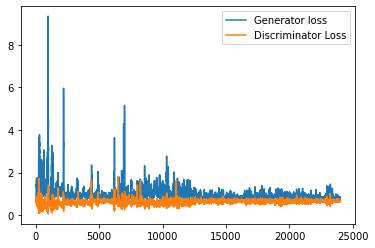

In [40]:
# plot and save the generator and discriminator loss
plt.figure()
plt.plot(losses_g, label='Generator loss')
plt.plot(losses_d, label='Discriminator Loss')
plt.legend()
plt.show()

In [41]:
# make a dataframe for sample list
for i in final_generated_samples:
  a = i.detach().numpy()
  final_generated_samples_list.append(a)
final_generated_samples_df = pd.DataFrame(final_generated_samples_list)

In [42]:
latent_space_samples[:10]

tensor([[0.3681, 0.4608, 0.1428, 0.3626, 0.0021, 0.6429, 0.8829, 0.8742],
        [0.1120, 0.3651, 0.6460, 0.2865, 0.8711, 0.7003, 0.2160, 0.2454],
        [0.3253, 0.8460, 0.2112, 0.7055, 0.5540, 0.4625, 0.6231, 0.1664],
        [0.7811, 0.3198, 0.3203, 0.2612, 0.3858, 0.1036, 0.8873, 0.0971],
        [0.0632, 0.0448, 0.2086, 0.6871, 0.8899, 0.3130, 0.1804, 0.6396],
        [0.6930, 0.6223, 0.8347, 0.1042, 0.6584, 0.4367, 0.2461, 0.6796],
        [0.4685, 0.2073, 0.2499, 0.9653, 0.8277, 0.2952, 0.9468, 0.5921],
        [0.7340, 0.6943, 0.6005, 0.0108, 0.5259, 0.8526, 0.0573, 0.0234],
        [0.4572, 0.6226, 0.4400, 0.9448, 0.5035, 0.5284, 0.1484, 0.7269],
        [0.6253, 0.2470, 0.1656, 0.1544, 0.3528, 0.7409, 0.2567, 0.9112]])

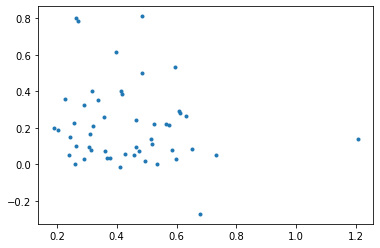

In [43]:
#plot of two variables from generated samples
plt.plot(final_generated_samples_df.iloc[:, 6], 
         final_generated_samples_df.iloc[:, 3], ".")

In [44]:
from scipy.spatial import distance

In [45]:
float_x = real_samples[0].double()

In [46]:
float_x = list(float_x.numpy())

In [47]:
# Cosine similarity
def square_rooted(x):
   return round(math.sqrt(sum([a*a for a in x])),3)
  
def cosine_similarity(x,y):
 numerator = sum(a*b for a,b in zip(x,y))
 denominator = square_rooted(x)*square_rooted(y)
 return round(numerator/float(denominator),3)
  
print(cosine_similarity(final_generated_samples_df[0],float_x))

0.378


In [48]:
#Jaccard similarity
from math import*
  
def jaccard_similarity(x,y):
 intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
 union_cardinality = len(set.union(*[set(x), set(y)]))
 return intersection_cardinality/float(union_cardinality)
print(jaccard_similarity([0,1,2,5,6],[0,2,3,5,7,9]))

0.375


In [49]:
import numpy as np
import pandas as pd
from sklearn.metrics import jaccard_score
from sklearn.metrics.pairwise import pairwise_distances,cosine_similarity

In [50]:
df9 = pd.DataFrame(scaler.inverse_transform(final_generated_samples_df))
df10 = pd.DataFrame(scaler.inverse_transform(train_data_01))

In [51]:
generated_vals2=[]
for i, j in df9.iterrows():
  generated_vals2.append(j.values)

generated_vals3 = generated_vals2[:10]

train_data_vals2=[]
for i, j in train_data_001.iterrows():
  train_data_vals2.append(j.values)


In [52]:
def cos_similarity(x,d):
  recommended = []  
  for i in d:
    a = cosine_similarity([x],[i])
    recommended.append(a)
  rec_score=max(recommended)
  rec_index = recommended.index(rec_score)
  rec_cos.append(rec_score)
  rec_idx = df13.index[rec_index]
  cos_name.append(rec_idx)
  rec_len = len(recommended)
  results1.append(['index:',rec_idx,'; cos sim:',rec_score])

In [53]:
def euclid_similarity(x,d):
  recommended = []  
  for i in d:
    a = distance.euclidean([x],[i])
    recommended.append(a)
  rec_score=min(recommended)
  rec_index = recommended.index(rec_score)
  rec_euc.append(rec_score)
  rec_idx = df13.index[rec_index]
  euc_name.append(rec_idx)
  rec_len = len(recommended)
  results2.append(['index:',rec_idx,'; euclid sim:',rec_score])

In [54]:
dst = distance.euclidean(final_generated_samples_df.iloc[0,:].values,float_x)
print('Euclidean distance: %.3f' % dst)

Euclidean distance: 1.549


In [55]:
# pick recommendations with cosine similarity
results1 =[]
cos_name =[]
rec_cos = []
for i in generated_vals2:
  a = cos_similarity(i,train_data_vals2)

In [56]:
cols2 = ['language']
cos_rec =  df4[df4['track_name'].isin(cos_name)]
cos_rec2 = cos_rec.drop(['playlist_id','track_id','track_name','track_artist'], axis=1)
#cos_rec2[cols2] = cos_rec2[cols2].apply(LabelEncoder().fit_transform)
cos_rec3 = cos_rec2.iloc[:2304,2:10]

In [57]:
cos_rec4=[]
for i, j in cos_rec3.iterrows():
  cos_rec4.append(j.values)

In [58]:
cos_rec3['track_name'] = df4['track_name']
cos_rec5 = cos_rec3.set_index('track_name')

In [59]:
rec_cose=[]
for i in rec_cos:
  rec_cose.append(i[0][0])

In [60]:
# pick recommendations with euclidean similarity
results2 =[]
euc_name =[]
rec_euc = []
for i in generated_vals2:
  a = euclid_similarity(i,train_data_vals2)

In [61]:
euc_rec =  df4[df4['track_name'].isin(euc_name)]
euc_rec2 = euc_rec.drop(['playlist_id','track_id','track_name','track_artist'], axis=1)
#euc_rec2[cols2] = euc_rec2[cols2].apply(LabelEncoder().fit_transform)
euc_rec3 = euc_rec2.iloc[:2304,2:10]

In [62]:
euc_rec4=[]
for i, j in euc_rec3.iterrows():
  euc_rec4.append(j.values)

In [63]:
euc_rec3['track_name'] = df4['track_name']
euc_rec5 = euc_rec3.set_index('track_name')

In [64]:
testdf1_3 = testdf1_2
testdf1_3['track_name'] = testdf1['track_name']
testdf1_3 = testdf1_3.set_index('track_name')

testdf2_3 = testdf2_2
testdf2_3['track_name'] = testdf2['track_name']
testdf2_3 = testdf2_3.set_index('track_name')

testdf3_3 = testdf3_2
testdf3_3['track_name'] = testdf3['track_name']
testdf3_3 = testdf3_3.set_index('track_name')

In [65]:
test_data1 = testdf1_3.values
test_data2 = testdf2_3.values
test_data3 = testdf3_3.values

In [66]:
def cos_similarity_t1(x,d):
  recommended = []  
  for i in d:
    a = cosine_similarity([x],[i])
    recommended.append(a)
  rec_score=max(recommended)
  rec_index = recommended.index(rec_score)
  rec_cosT1.append(rec_score)
  rec_idx = cos_rec5.index[rec_index]
  cost1_name.append(rec_idx)
  rec_len = len(recommended)
  print('len train data:',rec_len,'; index:',rec_idx,'; cos sim:',rec_score)

def euclid_similarity_t1(x,d):
  recommended = []  
  for i in d:
    a = distance.euclidean([x],[i])
    recommended.append(a)
  rec_score=min(recommended)
  rec_index = recommended.index(rec_score)
  rec_eucT1.append(rec_score)
  rec_idx = euc_rec5.index[rec_index]
  euct1_name.append(rec_idx)
  rec_len = len(recommended)
  print('len train data:',rec_len,'; index:',rec_idx,'; euclid sim:',rec_score)

In [67]:
#compare recomendations to test subjects
cost1_name = []
rec_cosT1 = []
for i in test_data1:
  a = cos_similarity_t1(i,cos_rec4)

len train data: 50 ; index: Missing You ; cos sim: [[0.99998826]]
len train data: 50 ; index: Freddy Krueger (feat. Tee Grizzley) ; cos sim: [[0.99999797]]
len train data: 50 ; index: Domino - 1999 Remaster ; cos sim: [[0.99999233]]
len train data: 50 ; index: Bandito ; cos sim: [[0.99997466]]
len train data: 50 ; index: Bored ; cos sim: [[0.99999019]]
len train data: 50 ; index: Domino - 1999 Remaster ; cos sim: [[0.99997069]]
len train data: 50 ; index: All on Me ; cos sim: [[0.99999245]]
len train data: 50 ; index: XLR ; cos sim: [[0.99998801]]
len train data: 50 ; index: Aprovecha (feat. Daddy Yankee) ; cos sim: [[0.99999494]]
len train data: 50 ; index: UnFazed (feat. The Weeknd) ; cos sim: [[0.99999653]]


In [68]:
rec_coseT1=[]
for i in rec_cosT1:
  rec_coseT1.append(i[0][0])

In [69]:
euct1_name = []
rec_eucT1 = []
for i in test_data1:
  a = euclid_similarity_t1(i,euc_rec4)

len train data: 55 ; index: Just Can't Get Enough ; euclid sim: 2.407115927827317
len train data: 55 ; index: Aquarius / Let the Sunshine In (The Flesh Failures) [Remastered] ; euclid sim: 2.1227171705387295
len train data: 55 ; index: Higher Ground ; euclid sim: 4.428556579981792
len train data: 55 ; index: Aquarius / Let the Sunshine In (The Flesh Failures) [Remastered] ; euclid sim: 2.197995593739894
len train data: 55 ; index: What Child Is This ; euclid sim: 1.133499480833143
len train data: 55 ; index: In Only Seven Days - Remastered 2011 ; euclid sim: 1.250204570333929
len train data: 55 ; index: Paradise - TiÃ«sto Remix ; euclid sim: 2.2072286900092637
len train data: 55 ; index: Jungle ; euclid sim: 0.0
len train data: 55 ; index: Ronca ; euclid sim: 4.4912641608460175
len train data: 55 ; index: Genie in a Bottle ; euclid sim: 1.4601177966224683


In [108]:
euct1_name

["Just Can't Get Enough",
 'Aquarius / Let the Sunshine In (The Flesh Failures) [Remastered]',
 'Higher Ground',
 'Aquarius / Let the Sunshine In (The Flesh Failures) [Remastered]',
 'What Child Is This',
 'In Only Seven Days - Remastered 2011',
 'Paradise - TiÃ«sto Remix',
 'Jungle',
 'Ronca',
 'Genie in a Bottle']

In [70]:
rec_eucT1

[2.407115927827317,
 2.1227171705387295,
 4.428556579981792,
 2.197995593739894,
 1.133499480833143,
 1.250204570333929,
 2.2072286900092637,
 0.0,
 4.4912641608460175,
 1.4601177966224683]

In [71]:
def cos_similarity_t2(x,d):
  recommended = []  
  for i in d:
    a = cosine_similarity([x],[i])
    recommended.append(a)
  rec_score=max(recommended)
  rec_index = recommended.index(rec_score)
  rec_cosT2.append(rec_score)
  rec_idx = cos_rec5.index[rec_index]
  cost2_name.append(rec_idx)
  rec_len = len(recommended)
  print('len train data:',rec_len,'; index:',rec_idx,'; cos sim:',rec_score)

def euclid_similarity_t2(x,d):
  recommended = []  
  for i in d:
    a = distance.euclidean([x],[i])
    recommended.append(a)
  rec_score=min(recommended)
  rec_index = recommended.index(rec_score)
  rec_eucT2.append(rec_score)
  rec_idx = euc_rec5.index[rec_index]
  euct2_name.append(rec_idx)
  rec_len = len(recommended)
  print('len train data:',rec_len,'; index:',rec_idx,'; euclid sim:',rec_score)

In [72]:
#compare recomendations to test subjects
cost2_name = []
rec_cosT2 = []
for i in test_data2:
  a = cos_similarity_t2(i,cos_rec4)

len train data: 50 ; index: Remember (Original Mix) ; cos sim: [[0.99999362]]
len train data: 50 ; index: With Or Without You - Kage Remix ; cos sim: [[0.99999657]]
len train data: 50 ; index: UnFazed (feat. The Weeknd) ; cos sim: [[0.99999592]]
len train data: 50 ; index: Remember (Original Mix) ; cos sim: [[0.99999464]]
len train data: 50 ; index: Missing You ; cos sim: [[0.99999521]]
len train data: 50 ; index: Missing You ; cos sim: [[0.99998724]]
len train data: 50 ; index: Bette Davis Eyes ; cos sim: [[0.9999859]]
len train data: 50 ; index: blun7 a swishland ; cos sim: [[0.99999016]]
len train data: 50 ; index: Loudspeaker ; cos sim: [[0.99998114]]
len train data: 50 ; index: Cha Cha Cha ; cos sim: [[1.]]
len train data: 50 ; index: A Warrior's Call ; cos sim: [[0.99998746]]
len train data: 50 ; index: London ; cos sim: [[0.9999952]]
len train data: 50 ; index: Bandito ; cos sim: [[0.99997621]]
len train data: 50 ; index: Missing You ; cos sim: [[0.99999358]]
len train data: 50 

In [115]:
cost2_name

['Remember (Original Mix)',
 'With Or Without You - Kage Remix',
 'UnFazed (feat. The Weeknd)',
 'Remember (Original Mix)',
 'Missing You',
 'Missing You',
 'Bette Davis Eyes',
 'blun7 a swishland',
 'Loudspeaker',
 'Cha Cha Cha',
 "A Warrior's Call",
 'London',
 'Bandito',
 'Missing You',
 'Something - Remastered 2009',
 'Flatline',
 "It's So Hard To Say Goodbye To Yesterday - Original Version"]

In [73]:
rec_coseT2=[]
for i in rec_cosT2:
  rec_coseT2.append(i[0][0])

In [74]:
euct2_name = []
rec_eucT2 = []
for i in test_data2:
  a = euclid_similarity_t2(i,euc_rec4)

len train data: 55 ; index: Good Nights (feat. Mascolo) ; euclid sim: 1.8295074798865971
len train data: 55 ; index: Still Got Me (feat. Jocelyn Bowman) ; euclid sim: 1.939226915350311
len train data: 55 ; index: Right Thurr ; euclid sim: 1.084095862919881
len train data: 55 ; index: Paradise ; euclid sim: 1.116991413594705
len train data: 55 ; index: Daar Gaat Ze ; euclid sim: 4.709134523475078
len train data: 55 ; index: Genie in a Bottle ; euclid sim: 2.035558851642454
len train data: 55 ; index: Paradise ; euclid sim: 1.1725702367186985
len train data: 55 ; index: Still Got Me (feat. Jocelyn Bowman) ; euclid sim: 0.6141327507957888
len train data: 55 ; index: Â¿QuÃ© Tengo Que Hacer? ; euclid sim: 2.8147316651397443
len train data: 55 ; index: Whore ; euclid sim: 1.7313928641414678
len train data: 55 ; index: Chartreuse ; euclid sim: 1.0622312904918578
len train data: 55 ; index: Aquarius / Let the Sunshine In (The Flesh Failures) [Remastered] ; euclid sim: 1.1790049733536883
len tr

In [75]:
def cos_similarity_t3(x,d):
  recommended = []  
  for i in d:
    a = cosine_similarity([x],[i])
    recommended.append(a)
  rec_score=max(recommended)
  rec_index = recommended.index(rec_score)
  rec_cosT3.append(rec_score)
  rec_idx = cos_rec5.index[rec_index]
  cost3_name.append(rec_idx) 
  rec_len = len(recommended)
  print('len train data:',rec_len,'; index:',rec_idx,'; cos sim:',rec_score)

def euclid_similarity_t3(x,d):
  recommended = []  
  for i in d:
    a = distance.euclidean([x],[i])
    recommended.append(a)
  rec_score=min(recommended)
  rec_index = recommended.index(rec_score)
  rec_eucT3.append(rec_score)
  rec_idx = euc_rec5.index[rec_index]
  euct3_name.append(rec_idx)
  rec_len = len(recommended)
  print('len train data:',rec_len,'; index:',rec_idx,'; euclid sim:',rec_score)

In [76]:
#compare recomendations to test subjects
cost3_name = []
rec_cosT3 = []
for i in test_data3:
  a = cos_similarity_t3(i,cos_rec4)

len train data: 50 ; index: Loudspeaker ; cos sim: [[0.99998805]]
len train data: 50 ; index: Loudspeaker ; cos sim: [[0.99998334]]
len train data: 50 ; index: Try ; cos sim: [[0.99999866]]
len train data: 50 ; index: Can't You See ; cos sim: [[0.9999817]]
len train data: 50 ; index: La Mordidita ; cos sim: [[0.99998984]]
len train data: 50 ; index: Something - Remastered 2009 ; cos sim: [[0.99999336]]
len train data: 50 ; index: Loudspeaker ; cos sim: [[0.99996833]]
len train data: 50 ; index: Freek'n You ; cos sim: [[0.99996004]]
len train data: 50 ; index: Loudspeaker ; cos sim: [[1.]]
len train data: 50 ; index: Classic (feat. POWERS) - POWERS Sunset Version ; cos sim: [[1.]]
len train data: 50 ; index: Bandito ; cos sim: [[0.99998631]]


In [77]:
rec_coseT3=[]
for i in rec_cosT3:
  rec_coseT3.append(i[0][0])

In [78]:
euct3_name = []
rec_eucT3 = []
for i in test_data3:
  a = euclid_similarity_t3(i,euc_rec4)

len train data: 55 ; index: Te Doy Mi Vida ; euclid sim: 1.454692714789706
len train data: 55 ; index: What Child Is This ; euclid sim: 3.1254399877535644
len train data: 55 ; index: Falling Away from Me ; euclid sim: 2.2184701844289014
len train data: 55 ; index: Ronca ; euclid sim: 3.6878526751383274
len train data: 55 ; index: Falling Away from Me ; euclid sim: 4.126718822454468
len train data: 55 ; index: Ronca ; euclid sim: 7.898767420458693
len train data: 55 ; index: Good Nights (feat. Mascolo) ; euclid sim: 1.6347041395558488
len train data: 55 ; index: Before You Go ; euclid sim: 2.245660591006576
len train data: 55 ; index: Aquarius / Let the Sunshine In (The Flesh Failures) [Remastered] ; euclid sim: 2.2062962380650535
len train data: 55 ; index: Bloom ; euclid sim: 5.008351012759326
len train data: 55 ; index: Bottom of a Bottle ; euclid sim: 2.4266590922009037


In [79]:
rec_coseT1.extend(rec_coseT2)

In [80]:
rec_coseT1.extend(rec_coseT3)

In [81]:
print(rec_coseT1)

[0.9999882565562278, 0.9999979657721999, 0.9999923315617796, 0.9999746647186672, 0.9999901937205865, 0.9999706879428859, 0.9999924474371015, 0.9999880066636926, 0.9999949362641557, 0.9999965341681638, 0.9999936206901414, 0.9999965721246039, 0.9999959190435552, 0.9999946435235009, 0.9999952057741548, 0.9999872392137804, 0.9999859006190891, 0.9999901625784263, 0.9999811356355937, 1.0000000000000002, 0.9999874616201471, 0.9999951986407136, 0.999976208736606, 0.9999935849885221, 0.999985199829622, 0.9999697845137847, 1.0000000000000002, 0.9999880504097526, 0.9999833384467354, 0.9999986641236054, 0.9999817025765818, 0.9999898416831324, 0.9999933611849076, 0.99996833069327, 0.9999600371403314, 0.9999999999999998, 1.0000000000000002, 0.9999863089756407]


In [82]:
rec_eucT1.extend(rec_eucT2)
rec_eucT1.extend(rec_eucT3)

In [83]:
print(rec_eucT1)

[2.407115927827317, 2.1227171705387295, 4.428556579981792, 2.197995593739894, 1.133499480833143, 1.250204570333929, 2.2072286900092637, 0.0, 4.4912641608460175, 1.4601177966224683, 1.8295074798865971, 1.939226915350311, 1.084095862919881, 1.116991413594705, 4.709134523475078, 2.035558851642454, 1.1725702367186985, 0.6141327507957888, 2.8147316651397443, 1.7313928641414678, 1.0622312904918578, 1.1790049733536883, 4.563023780345656, 2.8010729801274317, 20.15725075282835, 6.859939086548072, 0.9709992636601236, 1.454692714789706, 3.1254399877535644, 2.2184701844289014, 3.6878526751383274, 4.126718822454468, 7.898767420458693, 1.6347041395558488, 2.245660591006576, 2.2062962380650535, 5.008351012759326, 2.4266590922009037]


In [121]:
EMrec_eucT1 = [2.136843399152123, 1.0653933029637461, 1.9697226327582233, 3.121205299239379, 1.2238199254792346, 1.9120460234000534, 0.0, 2.3558988348399117, 0.0, 1.375095014898964, 2.549076193074652, 1.4183007614747978, 1.6935145703536112, 1.572704807012433, 0.8140949637480789, 0.8951894539146443, 2.036887822144362, 1.5665554454279618, 1.1827994800472312, 1.3525843559645372, 2.208623041263498, 0.35951267015224825, 3.2997775455324283, 1.7003965537485755, 6.59356102439342, 3.0501334413431818, 1.318663406635655, 1.063355302803335, 0.3620314903430365, 1.0149487918116757, 2.0333976200008204, 1.5653104356644476, 5.435379379583356, 2.051496290515783, 3.300246380196482, 3.3088163230980365, 2.2690441577897995, 5.200865024983832]

In [122]:
NMrec_coseT1 = [0.9999932487667178, 0.9999967215831126, 0.9999933745520302, 0.9999795860425241, 0.9999879469873235, 0.9999889343896217, 0.9999984166143743, 1.0000000000000002, 0.9999971002493233, 0.9999848761899961, 0.9999809979599981, 0.9999947548279028, 0.9999948619636779, 0.9999975161257679, 0.999981209047114, 0.9999936176253443, 0.9999897789176083, 0.9999858330464003, 0.9999947701079364, 0.9999712959469053, 0.9999821019273762, 0.9999946407075987, 0.999995156413043, 0.9999866710780829, 0.9999988606098704, 0.9999643377538886, 0.9999794144009473, 0.9999891105620674, 0.9999990417444762, 0.9999930197849295, 0.9999959817335284, 0.999994307563816, 0.999986825204495, 0.9999968618587575, 0.9999844313947372, 0.9999849360413169, 0.9999971323342577, 0.9999698646143627]

In [123]:
# leven test for equal variance p-value lower than 0.01 means not equal
from scipy.stats import levene
stat, p = levene(rec_eucT1, EMrec_eucT1)
print('pvalue < 0.05 means not equal variance, pvalue:' ,p)

pvalue < 0.05 means not equal variance, pvalue: 0.1926058515050053


In [124]:
from scipy import stats
#stats.ttest_ind(rec_eucT1, EMrec_eucT1,equal_var = False)
stats.ttest_rel(rec_eucT1, EMrec_eucT1)

Ttest_relResult(statistic=2.285313795487333, pvalue=0.028121465313354126)

In [125]:
# leven test for equal variance p-value lower than 0.01 means not equal
from scipy.stats import levene
stat, p = levene(rec_coseT1, NMrec_coseT1)
print('pvalue > 0.01 means equal variance, pvalue:' ,p)

pvalue > 0.01 means equal variance, pvalue: 0.6812768611477693


In [126]:
import scipy.stats as stats
#stats.ttest_ind(rec_coseT1, b=NMrec_coseT1, equal_var=False)
stats.ttest_rel(rec_coseT1, b=NMrec_coseT1)

Ttest_relResult(statistic=-0.4461314774204095, pvalue=0.6581022836358861)

In [90]:
print(len(rec_eucT1))
print(len(EMrec_eucT1))

38
38


The two hypotheses for this particular two sample t-test are as follows:

H0: µ1 = µ2 (the two population means are equal)

HA: µ1 ≠µ2 (the two population means are not equal)

Because the p-value of our test (0.0331) is less than alpha = 0.05, we reject the null hypothesis of the test. We do not have sufficient evidence to say that the mean height of plants between the two populations is different.

In [92]:
testing34 = testdf1.iloc[:,[0,2]]
testing34

,track_name,track_artist
136,I Dare You,The xx
186,Howling,RY X
286,Lower,TENDER
393,Prettiest Virgin (Radio Edit),Agar Agar
429,Love Is a Bitch,Two Feet
451,Song For You,Rhye
473,Afternoon,TENDER
559,Jungle,Tash Sultana
1012,Tainted,TENDER
1089,Un autre que moi,Fishbach


In [93]:
testing35 = testdf2.iloc[:,[0,2]]
testing35

,track_name,track_artist
7,Tender Lover,Babyface
162,I'm Dreamin',Christopher Williams
194,I Adore Mi Amor,Color Me Badd
207,Miss You Much,Janet Jackson
410,When Can I See You,Babyface
449,Rump Shaker,Wreckx-N-Effect
563,Lyte as a Rock,MC Lyte
622,Poison,Bell Biv DeVoe
781,My Prerogative,Bobby Brown
803,Cha Cha Cha,MC Lyte


In [94]:
testing36 = testdf3.iloc[:,[0,2]]
testing36

,track_name,track_artist
85,On Fire,Carmada
211,Hall & Oates,Satchmode
309,Sway - Chainsmokers Remix,Anna of the North
463,Feel It All Around,Washed Out
474,Ghost - Lost Kings Remix,Halsey
500,Cool Blue,The Japanese House
538,Anywhere We Go,Kaptan
923,Indecision,Shura
929,Loudspeaker,MUNA
1279,Classic (feat. POWERS) - POWERS Sunset Version,The Knocks


In [95]:
df1_rec =  df4[df4['track_name'].isin(euct1_name)]
df2_rec =  df4[df4['track_name'].isin(euct2_name)]
df3_rec =  df4[df4['track_name'].isin(euct3_name)]
dfc1_rec =  df4[df4['track_name'].isin(cost1_name)]
dfc2_rec =  df4[df4['track_name'].isin(cost2_name)]
dfc3_rec =  df4[df4['track_name'].isin(cost3_name)]

In [116]:
testing37 = df1_rec.iloc[:,[0,2]]
testing37_dict = dict(zip(testing37.track_name, testing37.track_artist))
eucdf1 = pd.DataFrame(euct1_name)
eucdf1['artist'] = eucdf1[0].map(testing37_dict)
eucdf1

,0,artist
0,Just Can't Get Enough,Depeche Mode
1,Aquarius / Let the Sunshine In (The Flesh Fail...,The 5th Dimension
2,Higher Ground,Stevie Wonder
3,Aquarius / Let the Sunshine In (The Flesh Fail...,The 5th Dimension
4,What Child Is This,Kelly Price
5,In Only Seven Days - Remastered 2011,Queen
6,Paradise - TiÃ«sto Remix,Coldplay
7,Jungle,Tash Sultana
8,Ronca,Don Omar
9,Genie in a Bottle,Campsite Dream


In [114]:
testing38 = df2_rec.iloc[:,[0,2]]
testing38_dict = dict(zip(testing38.track_name, testing38.track_artist))
eucdf2 = pd.DataFrame(euct2_name)
eucdf2['artist'] = eucdf2[0].map(testing38_dict)
eucdf2

,0,artist
0,Good Nights (feat. Mascolo),Whethan
1,Still Got Me (feat. Jocelyn Bowman),GAWVI
2,Right Thurr,Chingy
3,Paradise,Coldplay
4,Daar Gaat Ze,Clouseau
5,Genie in a Bottle,Campsite Dream
6,Paradise,Coldplay
7,Still Got Me (feat. Jocelyn Bowman),GAWVI
8,Â¿QuÃ© Tengo Que Hacer?,Daddy Yankee
9,Whore,In This Moment


In [117]:
testing39 = df3_rec.iloc[:,[0,2]]
testing39_dict = dict(zip(testing39.track_name, testing39.track_artist))
eucdf3 = pd.DataFrame(euct3_name)
eucdf3['artist'] = eucdf3[0].map(testing39_dict)
eucdf3

,0,artist
0,Te Doy Mi Vida,Lucas Arnau
1,What Child Is This,Kelly Price
2,Falling Away from Me,Korn
3,Ronca,Don Omar
4,Falling Away from Me,Korn
5,Ronca,Don Omar
6,Good Nights (feat. Mascolo),Whethan
7,Before You Go,Lewis Capaldi
8,Aquarius / Let the Sunshine In (The Flesh Fail...,The 5th Dimension
9,Bloom,Hilder Sky


In [118]:
testing40 = dfc1_rec.iloc[:,[0,2]]
testing40_dict = dict(zip(testing40.track_name, testing40.track_artist))
cosdf1 = pd.DataFrame(cost1_name)
cosdf1['artist'] = cosdf1[0].map(testing40_dict)
cosdf1

,0,artist
0,Missing You,The Vamps
1,Freddy Krueger (feat. Tee Grizzley),YNW Melly
2,Domino - 1999 Remaster,Van Morrison
3,Bandito,Enzo Dong
4,Bored,Billie Eilish
5,Domino - 1999 Remaster,Van Morrison
6,All on Me,Olivia King
7,XLR,BONES
8,Aprovecha (feat. Daddy Yankee),Nova y Jory
9,UnFazed (feat. The Weeknd),Lil Uzi Vert


In [119]:
testing41 = dfc2_rec.iloc[:,[0,2]]
testing41_dict = dict(zip(testing41.track_name, testing41.track_artist))
cosdf2 = pd.DataFrame(cost2_name)
cosdf2['artist'] = cosdf2[0].map(testing41_dict)
cosdf2

,0,artist
0,Remember (Original Mix),The Underdog Project
1,With Or Without You - Kage Remix,Maddix
2,UnFazed (feat. The Weeknd),Lil Uzi Vert
3,Remember (Original Mix),The Underdog Project
4,Missing You,The Vamps
5,Missing You,The Vamps
6,Bette Davis Eyes,Kim Carnes
7,blun7 a swishland,tha Supreme
8,Loudspeaker,MUNA
9,Cha Cha Cha,MC Lyte


In [120]:
testing42 = dfc3_rec.iloc[:,[0,2]]
testing42_dict = dict(zip(testing42.track_name, testing42.track_artist))
cosdf3 = pd.DataFrame(cost3_name)
cosdf3['artist'] = cosdf3[0].map(testing42_dict)
cosdf3

,0,artist
0,Loudspeaker,MUNA
1,Loudspeaker,MUNA
2,Try,6o
3,Can't You See,The Marshall Tucker Band
4,La Mordidita,Ricky Martin
5,Something - Remastered 2009,The Beatles
6,Loudspeaker,MUNA
7,Freek'n You,Jodeci
8,Loudspeaker,MUNA
9,Classic (feat. POWERS) - POWERS Sunset Version,The Knocks


In [102]:
def oneslistmaker(n):
    listofones = [1] * n
    return listofones

In [103]:
#classification report with emotion model cosine distance
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import accuracy_score,confusion_matrix 
y_true = oneslistmaker(32)
y_pred = [0,0,1,0,0,0,1,0	,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1]
conf_matrix1 = confusion_matrix(y_true=y_true, y_pred=y_pred)

print('Cosine similarrity model accuracy with emotion:',accuracy_score(y_true, y_pred))

Cosine similarrity model accuracy with emotion: 0.25


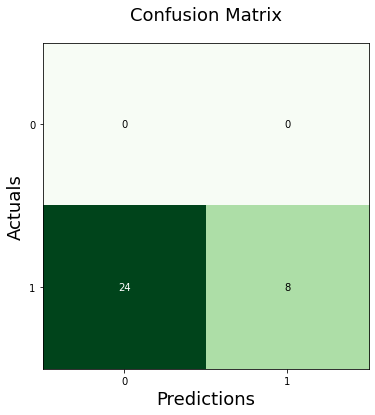

In [ ]:
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix1, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

import seaborn as sns

cm = confusion_matrix(y_true, y_pred)
#f = sns.heatmap(cm, annot=True)

In [ ]:
#classification report with emotion model euclidean distance
target_names = oneslistmaker(32)
y_true = oneslistmaker(32)
y_pred = [1,0,1,1,1,1,0,1,0,1,0,1,0,1,0,0,0,1,1,0,1,1,1,0,1,0,1,1,1,1,1,1]
conf_matrix2 = confusion_matrix(y_true=y_true, y_pred=y_pred)
print('Euclidean distance model accuracy with emotion:',accuracy_score(y_true, y_pred))

Euclidean distance model accuracy with emotion: 0.65625


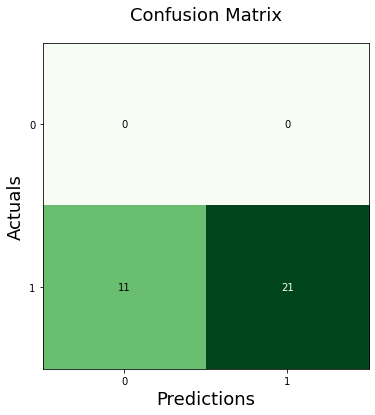

In [ ]:
#confusion matrix with emotion model for the euclidean distance
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix2, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
#classification report with no emotion model cosine similarity
from sklearn.metrics import accuracy_score
y_true = oneslistmaker(32)
y_pred = [0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0]
print('Cosine distance model accuracy with emotion:',accuracy_score(y_true, y_pred))

Cosine distance model accuracy with emotion: 0.1875


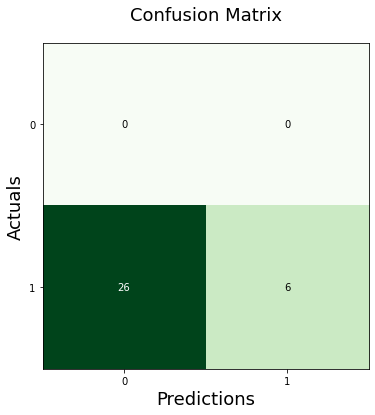

In [ ]:
#confusion matrix with no emotion model for the cosine similarity
conf_matrix1 = confusion_matrix(y_true=y_true, y_pred=y_pred)
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix1, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
#classification report with no emotion model euclidean distance
#conf_matrix2 = confusion_matrix(y_true=y_test, y_pred=y_pred)
target_names = oneslistmaker(32)
y_true = oneslistmaker(32)
y_pred = [1,0,1,1,1,0,0,1,0,1,1,1,0,0,0,1,1,1,0,1,1,1,1,1,0,1,0,1,1,1,0,0]
print('Euclidean distance model accuracy with emotion:',accuracy_score(y_true, y_pred))

Euclidean distance model accuracy with emotion: 0.625


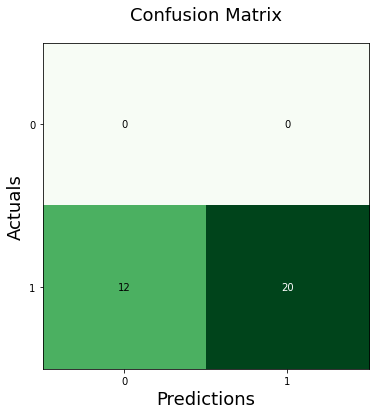

In [ ]:
#confusion matrix with no emotion model for the cosine similarity
conf_matrix2 = confusion_matrix(y_true=y_true, y_pred=y_pred)
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix2, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
rec_cosT1[:10]

[array([[0.9999841]]),
 array([[0.99997017]]),
 array([[0.99996841]]),
 array([[0.99998848]]),
 array([[0.99996484]]),
 array([[0.99997355]]),
 array([[0.9999709]]),
 array([[0.99997137]]),
 array([[0.99997004]]),
 array([[0.9999875]])]

In [ ]:
(rec_eucT2)

[2.881095846736787,
 3.009589016949237,
 4.227493153584038,
 3.273390278615863,
 3.086226610309906,
 2.5899771532776135,
 3.7920290025394108,
 3.0082638647595923,
 6.032963216573605,
 2.4694432975875333,
 27.948129872469128]

In [ ]:
(rec_eucT1[:10])

[2.1989201076892386,
 3.459064693873193,
 5.8022684608963235,
 3.513973913733569,
 3.669265847064164,
 3.1696068478598414,
 1.035656120534225,
 3.2805306135698515,
 6.309128958105068,
 2.875532336805434]